In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_380.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_517.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_364.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_258.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_237.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_476.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_563.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_159.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_464.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_518.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_141.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_398.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_442.jpg
/kaggle/input/cats-and-dogs-image-classification/test/dogs/dog_443.jpg
/kaggl

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Задаем параметры модели
input_shape = (150, 150, 3)
num_classes = 2
batch_size = 32

# Создаем генераторы для обучения
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
train_generator = train_datagen.flow_from_directory('/kaggle/input/cats-and-dogs-image-classification/train', target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')


# Создаем и компилируем модель
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Обучаем модель
history = model.fit(train_generator, epochs=50, validation_data=train_generator)

# Оцениваем модель на тестовых данных
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory('/kaggle/input/cats-and-dogs-image-classification/test', target_size=input_shape[:2], batch_size=batch_size, class_mode='categorical')

Found 557 images belonging to 2 classes.
Epoch 1/50
18/18 [==============================] - 39s 2s/step - loss: 1.1218 - accuracy: 0.5009 - val_loss: 0.6906 - val_accuracy: 0.5655
Epoch 2/50
18/18 [==============================] - 38s 2s/step - loss: 0.6909 - accuracy: 0.5709 - val_loss: 0.6880 - val_accuracy: 0.5027
Epoch 3/50
18/18 [==============================] - 37s 2s/step - loss: 0.6836 - accuracy: 0.5745 - val_loss: 0.6871 - val_accuracy: 0.5422
Epoch 4/50
18/18 [==============================] - 38s 2s/step - loss: 0.6724 - accuracy: 0.5763 - val_loss: 0.6531 - val_accuracy: 0.6427
Epoch 5/50
18/18 [==============================] - 37s 2s/step - loss: 0.6511 - accuracy: 0.6248 - val_loss: 0.6177 - val_accuracy: 0.6661
Epoch 6/50
18/18 [==============================] - 37s 2s/step - loss: 0.6369 - accuracy: 0.6445 - val_loss: 0.6032 - val_accuracy: 0.6840
Epoch 7/50
18/18 [==============================] - 37s 2s/step - loss: 0.6008 - accuracy: 0.6930 - val_loss: 0.5771 - 

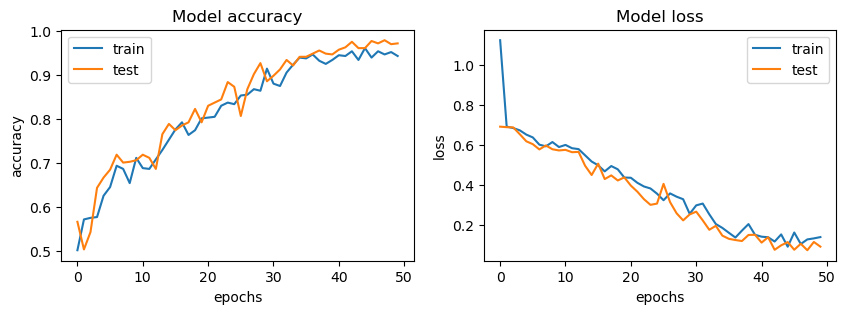

In [9]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax = ax.ravel()

for i, met in enumerate(['accuracy', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'test'])

1/1 [==============================] - 0s 41ms/step
Predicted class: cats


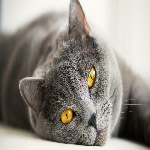

In [35]:
import numpy as np
from tensorflow.keras.preprocessing import image

# загружаем изображение
img_path = '/kaggle/input/kotcheck/kot2.jpg'
img = image.load_img(img_path, target_size=input_shape[:2])

# преобразуем изображение в массив numpy
img_array = image.img_to_array(img)

# масштабируем изображение
img_array = img_array / 255.

# добавляем еще одну размерность в массив, чтобы сделать его 4-мерным (batch size, width, height, channels)
img_array = np.expand_dims(img_array, axis=0)

# получаем предсказание модели
prediction = model.predict(img_array)

# преобразуем предсказание в метки классов
predicted_class_indices = np.argmax(prediction, axis=1)

# получаем словарь меток классов
labels = (train_generator.class_indices)

# инвертируем словарь меток классов
inv_labels = {v: k for k, v in labels.items()}

# получаем предсказанную метку класса
predicted_class = inv_labels[predicted_class_indices[0]]

print('Predicted class:', predicted_class)
img

1/1 [==============================] - 0s 41ms/step
Predicted class: dogs


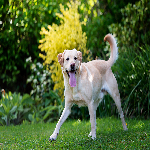

In [36]:
# загружаем изображение
img_path = '/kaggle/input/dogcheck/sob.jpg'
img = image.load_img(img_path, target_size=input_shape[:2])

# преобразуем изображение в массив numpy
img_array = image.img_to_array(img)

# масштабируем изображение
img_array = img_array / 255.

# добавляем еще одну размерность в массив, чтобы сделать его 4-мерным (batch size, width, height, channels)
img_array = np.expand_dims(img_array, axis=0)

# получаем предсказание модели
prediction = model.predict(img_array)

# преобразуем предсказание в метки классов
predicted_class_indices = np.argmax(prediction, axis=1)

# получаем словарь меток классов
labels = (train_generator.class_indices)

# инвертируем словарь меток классов
inv_labels = {v: k for k, v in labels.items()}

# получаем предсказанную метку класса
predicted_class = inv_labels[predicted_class_indices[0]]

print('Predicted class:', predicted_class)
img

In [44]:
print(labels)
print(inv_labels)
predicted_class_indices

{'cats': 0, 'dogs': 1}
{0: 'cats', 1: 'dogs'}


array([1])